<a href="https://colab.research.google.com/github/Muadali/MLA_AAD/blob/main/MLA_AAD_FinalProject_Classification_AAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Final Project Classification

**Abdifatah Dahiye**

**CS430-ON**

**Machine Learning in the Cloud**

**Logistic Regression**

**Standard Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Imports for Specific Models**

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV 

**Imports for Splitting Data and Building Pipeline**

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

**Imports for Performance Measures**

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**ROC_Curve Function**

In [6]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Problem 2

**Reading the Data**

In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/ds_salaries.csv')

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [9]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [10]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1661,2023,MI,FT,Data Engineer,105000,USD,105000,US,0,US,M
587,2023,SE,FT,Data Engineer,150000,USD,150000,US,0,US,M
731,2023,SE,FT,Data Architect,113900,USD,113900,US,100,US,M
121,2023,SE,FT,Machine Learning Engineer,283200,USD,283200,US,100,US,M
1895,2022,MI,FT,Data Scientist,75000,GBP,92350,GB,0,GB,M
3625,2021,SE,FT,AI Scientist,55000,USD,55000,ES,100,ES,L
1833,2022,SE,FT,Data Science Consultant,128000,USD,128000,US,0,US,M
3690,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L
1283,2023,SE,FT,Data Science Lead,156400,USD,156400,US,0,US,M
3687,2021,EN,PT,Computer Vision Engineer,180000,DKK,28609,DK,50,DK,S


In [11]:
list(df)

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [12]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [13]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [14]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [15]:
df.dropna(subset=['salary'], inplace=True)

In [16]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [22]:
salary = df['salary'].groupby(df['salary']).count()

In [23]:
salary

salary
6000        1
7000        1
7500        1
8000        2
8760        1
           ..
7000000     2
7500000     1
8500000     1
11000000    2
30400000    1
Name: salary, Length: 815, dtype: int64

([<matplotlib.axis.XTick at 0x7f0926037ac0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

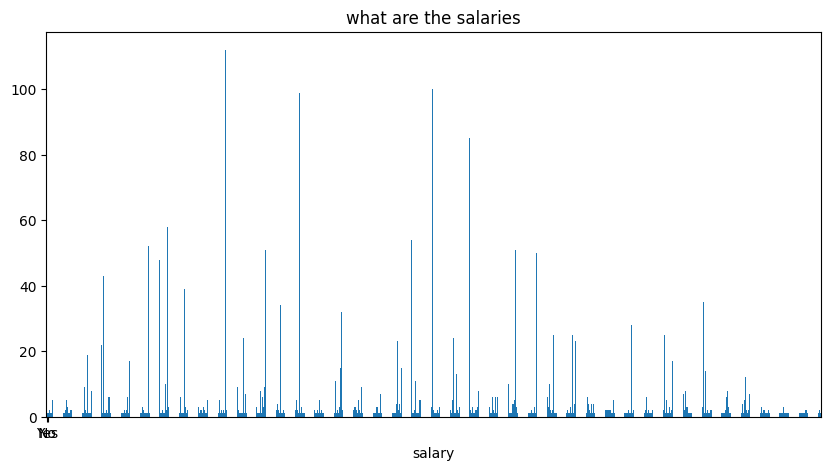

In [24]:
salary.plot(kind='bar', figsize=(10,5), title='what are the salaries')
ticks = [0,1]
labels = ['No', 'Yes']
plt.xticks(ticks, labels, rotation=0, horizontalalignment="center")

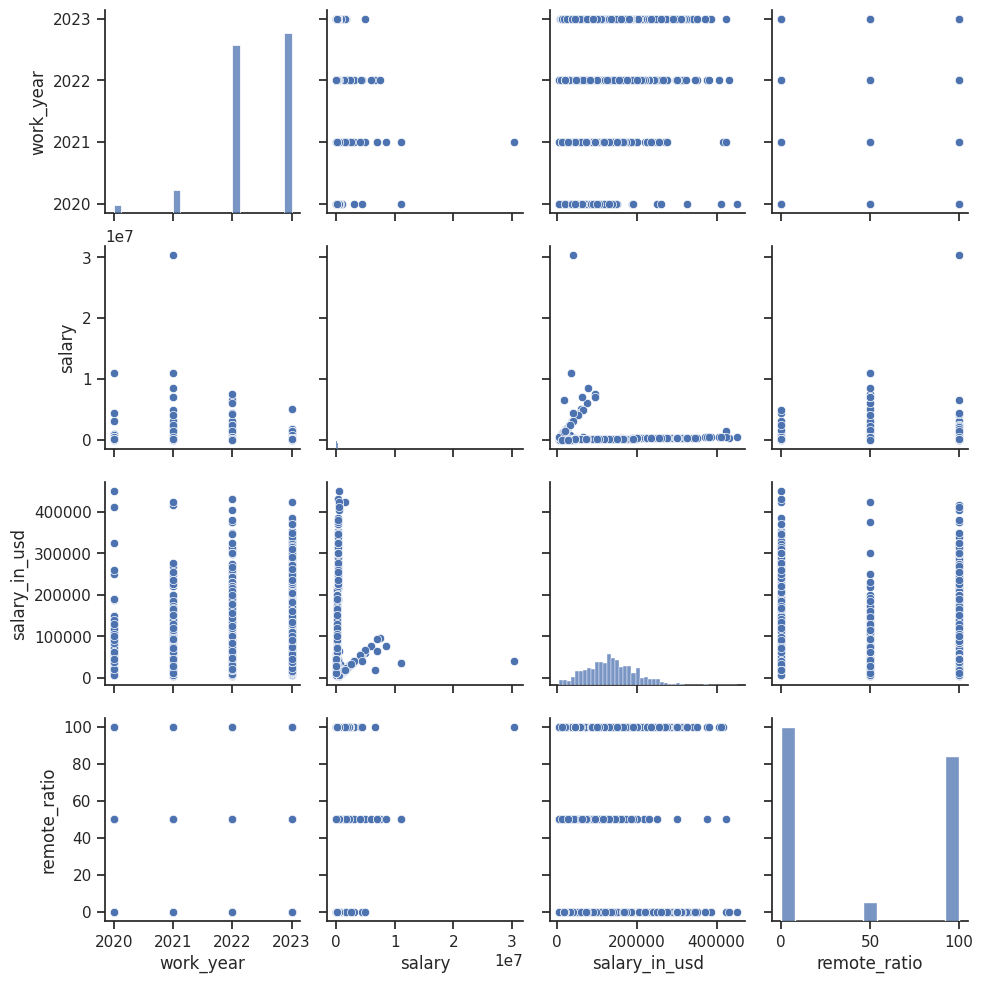

In [25]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)

**Splitting Data into Train/Test**

In [26]:
df.drop(['salary', 'remote_ratio', 'salary_in_usd', 'work_year',], axis=1, inplace=True)

In [40]:
df.columns


Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [44]:
X = df[['experience_level', 'employment_type', 'company_size', 'salary_currency']]

In [46]:
y = df[['salary_currency']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [54]:
num_attribs = ['experience_level', 'employment_type', 'company_size']
cat_attribs = ['salary_currency', 'employee_residence']

In [49]:
col_transform = ColumnTransformer(transformers=[
                                  ('cat', OneHotEncoder(), cat_attribs),
                                  ('num', MinMaxScaler(), num_attribs)],
                                  remainder='passthrough'
                                   )

In [50]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('log', LogisticRegression(max_iter=100000)),
                      ])

**Executing the Model - Logistic Regression**

In [56]:
pipeline.fit(X_train, np.ravel(y_train))

ValueError: ignored

In [57]:
print(df.columns)

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [58]:
print('company_location' in df.columns)

True


In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

In [ ]:
pipeline.fit(X_train, y_train)

**Evaluating the Model - Logistic Regression**

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_train_pred = pipeline.predict(X_train)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

In [ ]:
print(classification_report(y_test, y_pred))

**Executing the Model - Decision Tree**

In [65]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

**Evaluating the Model - Decision Tree**

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

In [ ]:

print(classification_report(y_test, y_pred))

**GridSearch**

In [69]:
param_grid = {'decision_tree__criterion':['gini','entropy'],'decision_tree__max_depth':[5,10,15,20]}
     

In [70]:
grid_pipeline = GridSearchCV(pipeline, param_grid)
     


In [ ]:
grid_pipeline.fit(X_train, np.ravel(y_train))

In [ ]:
grid_pipeline.best_params_

In [73]:
new_pipeline = Pipeline([
                     ('trans', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(criterion='entropy',max_depth=5))
                     ])
     

In [ ]:
new_pipeline.fit(X_train,np.ravel(y_train))

In [ ]:

y_pred = new_pipeline.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

In [ ]:
print(classification_report(y_test, y_pred))